# Projet 07 : Effectuer une prédiction de revenus

---
**Importation des librairies**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import matplotlib.colors as plc
import seaborn as sns
import scipy.stats as st
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
import modules_perso.sf_graphiques as sfg

---
## <font color=blue>Mission 4 : Modélisation du revenu des individus</font>

### 4.8. ANOVA du logarithme du revenu basée sur le logarithme du revenu moyen et l'indice de Gini du pays, et sur le logarithme du revenu des parents

In [4]:
data = pd.read_csv("data_analyse08.csv", index_col=0)
data.head()

C:\Anaconda3\envs\Jupyter\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,ln_child_income,ln_revenu_moyen,gini_from_centiles,ln_parent_income
0,6.591534,8.004643,32.141019,6.591534
1,6.591534,8.004643,32.141019,6.591534
2,6.591534,8.004643,32.141019,6.591534
3,6.591534,8.004643,32.141019,6.591534
4,6.591534,8.004643,32.141019,6.591534


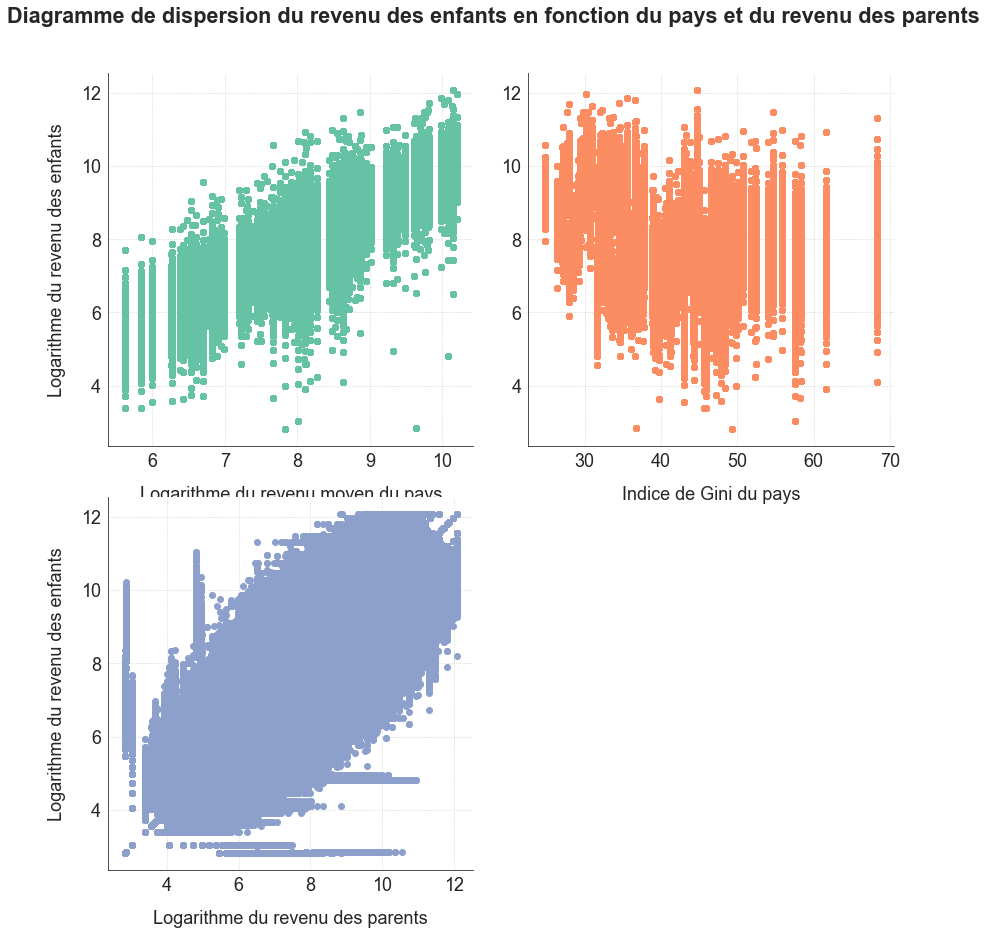

In [5]:
mygraph = sfg.MyGraph("Diagramme de dispersion du revenu des enfants en fonction du pays et du revenu des parents", nblin=2, nbcol=2, is_mono=False, figsize=(12,12))
mygraph.add_plot(data.ln_revenu_moyen, data.ln_child_income, label="", marker='o', color=mygraph.liste_couleurs[0], linestyle='', with_grid='both', grid_style=":", multi_index=1)
mygraph.add_plot(data.gini_from_centiles, data.ln_child_income, label="", marker='o', markeredgecolor=mygraph.liste_couleurs[1], markerfacecolor=mygraph.liste_couleurs[1], linestyle='', with_grid='both', grid_style=":", multi_index=2)
mygraph.add_plot(data.ln_parent_income, data.ln_child_income, label="", marker='o', color=mygraph.liste_couleurs[2], linestyle='', with_grid='both', grid_style=":", multi_index=3)
mygraph.set_axe('x', label="Logarithme du revenu moyen du pays", multi_index=1)
mygraph.set_axe('x', label="Indice de Gini du pays", multi_index=2)
mygraph.set_axe('x', label="Logarithme du revenu des parents", multi_index=3)
mygraph.set_axe('y', label="Logarithme du revenu des enfants", multi_index=1)
mygraph.set_axe('y', label="Logarithme du revenu des enfants", multi_index=3)
mygraph.ax[3].set_visible(False)
fig, ax = mygraph.fig, mygraph.ax
plt.savefig("anova08_00_diagramme_dispersion.png")
plt.show()

Ces graphiques confirment encore une fois la pertinence de considérer le logarithme des revenus.  
La relation linéaire croissante entre le logarithme du revenu des enfants et le logarithme du revenu moyen du pays se dessine nettement. Il en va de même pour la relation entre le logarithme du revenu des enfants et le logarithme des revenus des parents. Le nuage de point du logarithme du revenu des enfants en fonction de l'indice de Gini ne montre pas de relation évidente mais reste assez compact.

In [6]:
anova = smf.ols(formula="ln_child_income ~ ln_revenu_moyen + gini_from_centiles + ln_parent_income", data=data).fit()

In [7]:
anova.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        ln_child_income   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                 7.352e+06
Date:                Fri, 11 Oct 2019   Prob (F-statistic):               0.00
Time:                        13:13:06   Log-Likelihood:            -5.3522e+06
No. Observations:             5642420   AIC:                         1.070e+07
Df Residuals:                 5642416   BIC:                         1.070e+07
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.2481      0.003     96.100      0.000       0.243       0.253
ln_revenu_moyen        0.4938      0.000   1143.565      0.000       0.493       0.495
gini_from_centiles    -0.0083   3.12e-05   -264.815      0.000      -0.008      -0.008
ln_parent_income       0.4994      0.000   1369.500      0.000       0.499       0.500
==============================================================================
Omnibus:                   354845.488   Durbin-Watson:                   0.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1600677.861
Skew:                          -0.103   Prob(JB):                         0.00
Kurtosis:                       5.601   Cond. No.                         414.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
table_anova = sm.stats.anova_lm(anova, typ=2)
table_anova.loc["total","sum_sq"] = table_anova.loc[:,"sum_sq"].sum()
table_anova.loc["total","df"] = table_anova.loc[:,"df"].sum()
table_anova["eta_squared"] = table_anova[:-2]["sum_sq"] / table_anova.loc["total","sum_sq"]
cmr = table_anova["sum_sq"][-1] / table_anova["df"][-1]
table_anova["omega_squared"] = (table_anova[:-2]["sum_sq"] - (table_anova[:-2]["df"] * cmr)) / (table_anova.loc["total","sum_sq"] + cmr)
table_anova

,sum_sq,df,F,PR(>F),eta_squared,omega_squared
ln_revenu_moyen,5.104651e+05,1.0,1.307741e+06,0.0,0.147006,0.147006
gini_from_centiles,2.737335e+04,1.0,7.012672e+04,0.0,0.007883,0.007883
ln_parent_income,7.320973e+05,1.0,1.875532e+06,0.0,0.210833,0.210833
Residual,2.202468e+06,5642416.0,NaN,NaN,NaN,NaN
total,3.472403e+06,5642419.0,NaN,NaN,NaN,NaN


La part de dispersion expliquée par le modèle (R²) est la plus haute obtenue jusqu'à maintenant : 79,6% de la variance totale. Les scores AIC et BIC diminuent, ce qui marque une amélioration de la qualité explicative du modèle.  
L'ANOVA conclut à la significativité des trois variables. La contribution de l'indice de Gini au modèle reste très faible (omega squared = 0.007). Il est intéressant de noter que le logarithme du revenu des parents devient maintenant le premier contributeur du modèle (omaga squared de 0.211 contre 0.147 pour le logarithme du revenu moyen).

### Vérification des hypothèses

**Hypothèse 1 : Normalité des résidus**

In [9]:
alpha_normalite = 0.05
ad_stat, ad_pvalue = sm.stats.normal_ad(anova.resid)
norm_stat, norm_pvalue = st.kstest(anova.resid, cdf='norm', args=(anova.resid.mean(), anova.resid.var(ddof=1)))
jb_stat, jb_pvalue, skw, kurt = sm.stats.stattools.jarque_bera(anova.resid)
df_normalite = pd.DataFrame({'H0':np.repeat("Distribution normale",3), 'Statistique':["{:.2f}".format(ad_stat),"{:.2f}".format(norm_stat),"{:.2f}".format(jb_stat)], \
                             'p-value':["{:.3f}".format(ad_pvalue),"{:.3f}".format(norm_pvalue),"{:.3f}".format(jb_pvalue)]}, index=["Anderson-Darling","Kolmogorov-Smirnov","Jarque-Bera"])
inter_col = "Résultat (seuil={:.1%})".format(alpha_normalite)
df_normalite[inter_col] = ["Normalité acceptée" if float(pval)>=alpha_normalite else "Normalité rejetée" for pval in df_normalite["p-value"]]
df_normalite

C:\Anaconda3\envs\Jupyter\lib\site-packages\statsmodels\stats\_adnorm.py:66: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  S = np.sum((2*i[sl1]-1.0)/N*(np.log(z)+np.log(1-z[sl2])), axis=axis)


,H0,Statistique,p-value,Résultat (seuil=5.0%)
Anderson-Darling,Distribution normale,12124.24,0.000,Normalité rejetée
Kolmogorov-Smirnov,Distribution normale,0.09,0.000,Normalité rejetée
Jarque-Bera,Distribution normale,1600677.86,0.000,Normalité rejetée


Aucun des trois test n'accepte la normalité. Nous avons un grand nombre d'observations. Une symétrie de la distribution des résidus sera suffisante. Je vérifie graphiquement cette symétrie, et je trace également la droite de Henry.

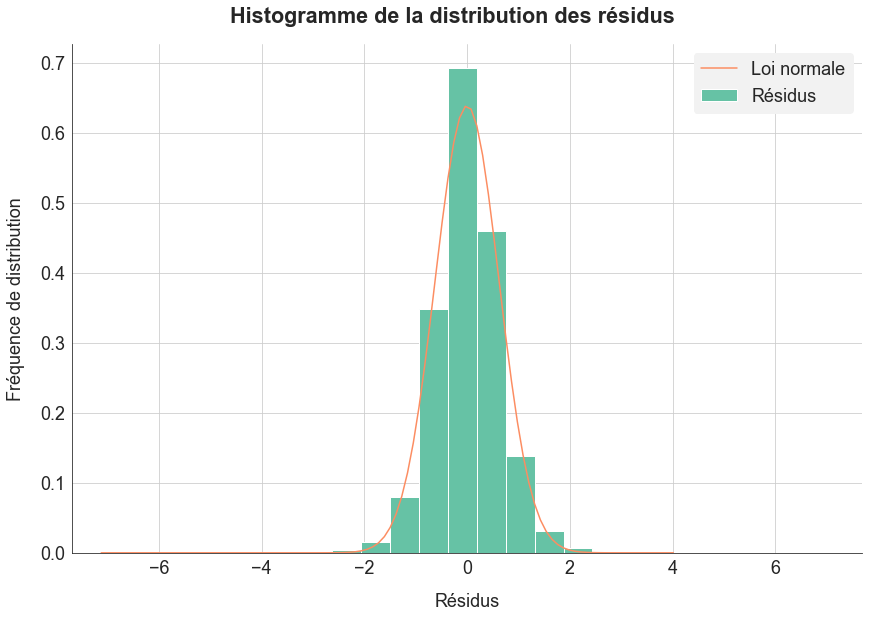

In [10]:
x_theo = np.arange(anova.resid.min(), anova.resid.max(), 0.01*(anova.resid.max()-anova.resid.min()))
mygraph = sfg.MyGraph("Histogramme de la distribution des résidus", is_mono=False)
mygraph.add_histogramme(anova.resid, bins=20, labels="Résidus")
mygraph.add_plot(x_theo, st.norm.pdf(x_theo, scale=anova.resid.std(ddof=1)), label="Loi normale", legend=True)
xmin, xmax = mygraph.ax[0].get_xlim()
absmax = max(-xmin, xmax)
mygraph.set_axe('y', label="Fréquence de distribution")
mygraph.set_axe('x', label="Résidus", tick_min=-absmax, tick_max=absmax)
fig, ax = mygraph.fig, mygraph.ax
plt.savefig("anova08_01_distribution_residus.png")
plt.show()

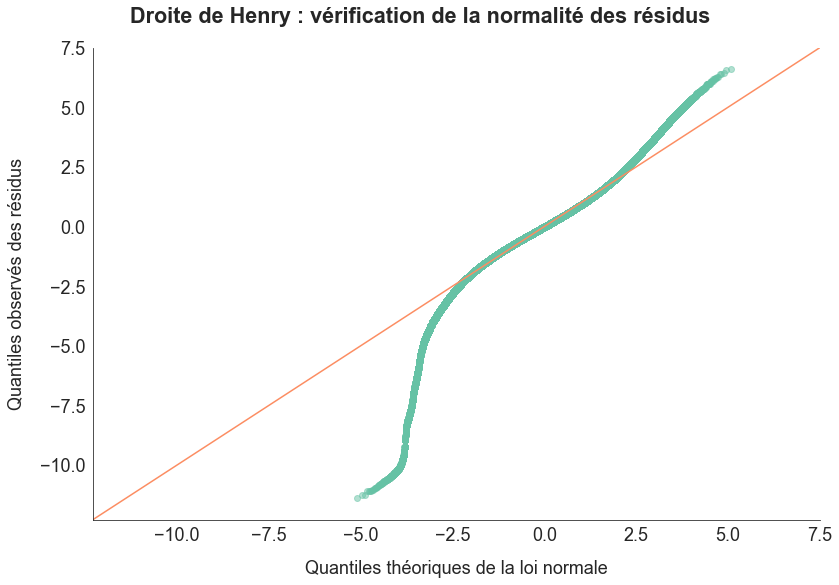

In [11]:
mygraph = sfg.MyGraph("Droite de Henry : vérification de la normalité des résidus", is_mono=False)
sm.qqplot(anova.resid, fit=True, markeredgecolor=mygraph.liste_couleurs[0], markerfacecolor=mygraph.liste_couleurs[0], alpha=0.5, ax=mygraph.ax[0])
ymin, ymax = mygraph.ax[0].get_ylim()
xmin, xmax = mygraph.ax[0].get_xlim()
data_min = min(xmin, ymin)
data_max = max(xmax, ymax)
mygraph.add_plot([data_min, data_max], [data_min, data_max], label="", color=mygraph.liste_couleurs[1])
mygraph.set_axe('x', label="Quantiles théoriques de la loi normale")
mygraph.set_axe('y', label="Quantiles observés des résidus")
mygraph.ax[0].autoscale(enable=True, axis='both', tight=True)
mygraph.fig.tight_layout()
fig, ax = mygraph.fig, mygraph.ax
plt.savefig("anova08_02_droite_henry.png")
plt.show()

On remarque que les résidus ne sont pas normaux. Par contre, ils présentent une symétrie assez bonne, même si elle n'est pas parfaite. Le graphique de la distribution des résidus reste satisfaisant vu le grand nombre de données de notre échantillon.  
La droite de Henry montre encore une fois la difficulté de modélisation des valeurs extrêmes. Comme pour le modèle précédent, les valeurs extrêmes ne subissent plus les mêmes effets de seuil que dans le modèle 4.

**Hypothèse 2 : Linéarité et additivité de la relation  
Hypothèse 3 : Homoscédasticité des résidus**

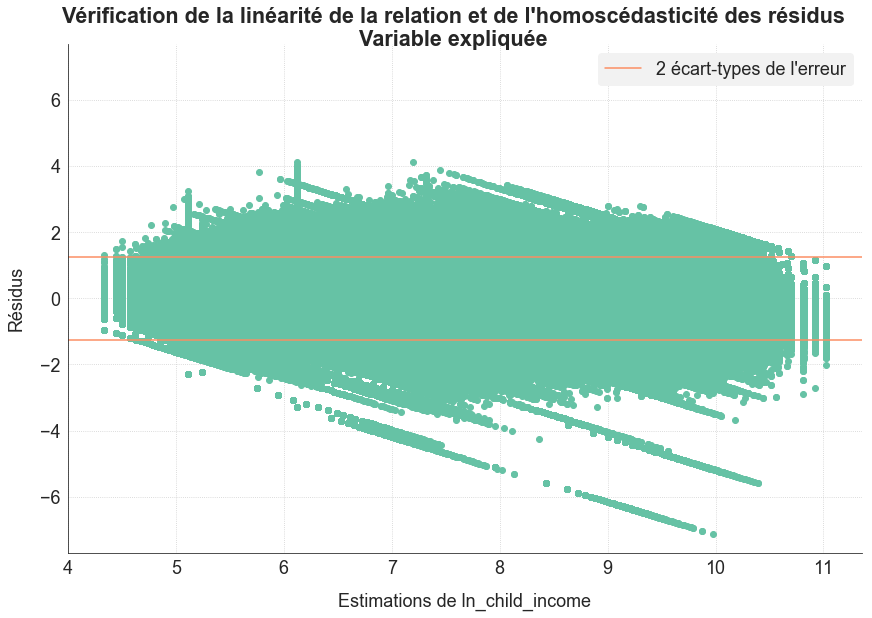

In [12]:
mygraph = sfg.MyGraph("Vérification de la linéarité de la relation et de l'homoscédasticité des résidus\nVariable expliquée", is_mono=False)
mygraph.add_plot(anova.fittedvalues, anova.resid, label="", marker='o', linestyle='', with_grid='both', grid_style=":")
yseuil = 2 * np.sqrt(table_anova.loc["Residual","sum_sq"] / table_anova.loc["Residual","df"])
mygraph.add_line(-yseuil, vertical=False, color=mygraph.liste_couleurs[1])
mygraph.add_line(yseuil, vertical=False, label="2 écart-types de l'erreur", color=mygraph.liste_couleurs[1], legend=True)
ymin, ymax = mygraph.ax[0].get_ylim()
absmax = max(-ymin, ymax, 1.1*yseuil)
mygraph.set_axe('x', label="Estimations de ln_child_income")
mygraph.set_axe('y', label="Résidus", tick_min=-absmax, tick_max=absmax)
fig, ax = mygraph.fig, mygraph.ax
plt.savefig("anova08_03_linearite_homoscedasticite_endo.png")
plt.show()

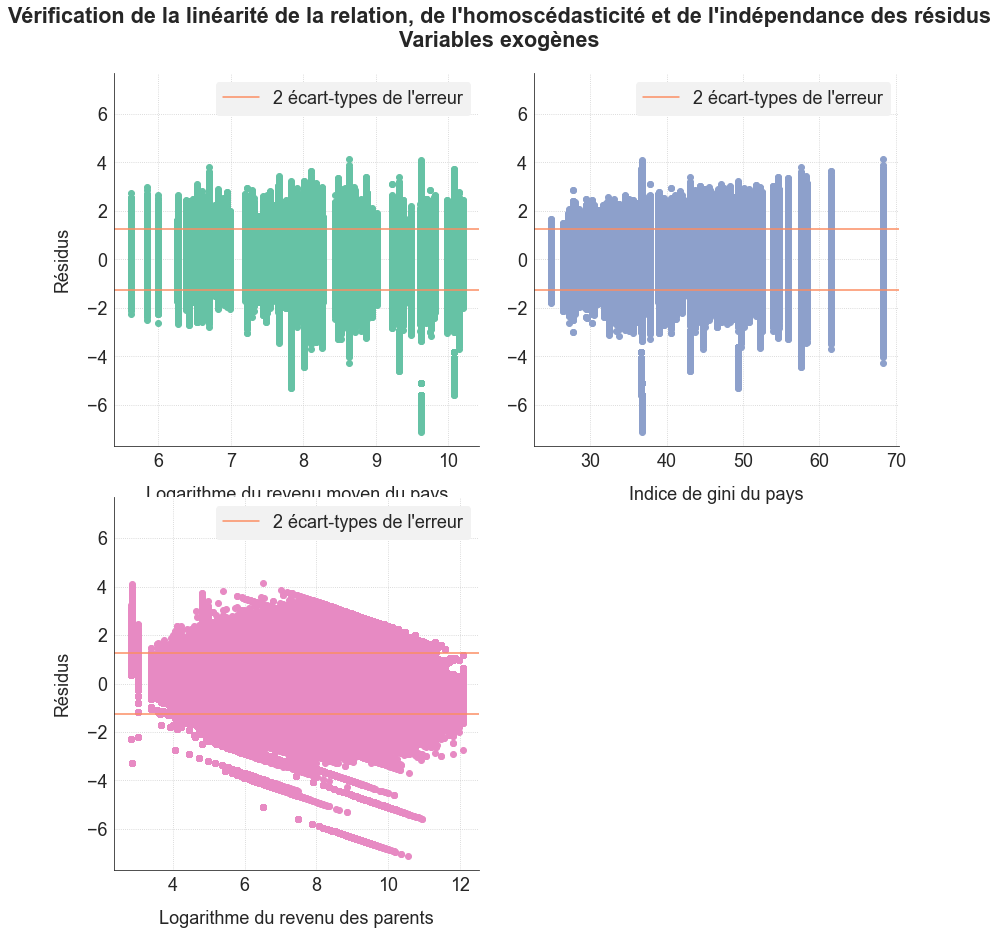

In [13]:
mygraph = sfg.MyGraph("Vérification de la linéarité de la relation, de l'homoscédasticité et de l'indépendance des résidus\nVariables exogènes", nblin=2, nbcol=2, is_mono=False, figsize=(12,12))
mygraph.add_plot(data.ln_revenu_moyen, anova.resid, label="", marker='o', color=mygraph.liste_couleurs[0], linestyle='', with_grid='both', grid_style=":", multi_index=1)
mygraph.add_plot(data.gini_from_centiles, anova.resid, label="", marker='o', color=mygraph.liste_couleurs[2], linestyle='', with_grid='both', grid_style=":", multi_index=2)
mygraph.add_plot(data.ln_parent_income, anova.resid, label="", marker='o', color=mygraph.liste_couleurs[3], linestyle='', with_grid='both', grid_style=":", multi_index=3)
#yseuil = 2 * np.sqrt(table_anova.loc["Residual","sum_sq"] / table_anova.loc["Residual","df"])
mygraph.add_line(-yseuil, vertical=False, color=mygraph.liste_couleurs[1], multi_index=1)
mygraph.add_line(yseuil, vertical=False, label="2 écart-types de l'erreur", color=mygraph.liste_couleurs[1], legend=True, multi_index=1)
mygraph.add_line(-yseuil, vertical=False, color=mygraph.liste_couleurs[1], multi_index=2)
mygraph.add_line(yseuil, vertical=False, label="2 écart-types de l'erreur", color=mygraph.liste_couleurs[1], legend=True, multi_index=2)
mygraph.add_line(-yseuil, vertical=False, color=mygraph.liste_couleurs[1], multi_index=3)
mygraph.add_line(yseuil, vertical=False, label="2 écart-types de l'erreur", color=mygraph.liste_couleurs[1], legend=True, multi_index=3)
ymin, ymax = mygraph.ax[0].get_ylim()
absmax = max(-ymin, ymax, 1.1*yseuil)
mygraph.set_axe('x', label="Logarithme du revenu moyen du pays", multi_index=1)
mygraph.set_axe('x', label="Indice de gini du pays", multi_index=2)
mygraph.set_axe('x', label="Logarithme du revenu des parents", multi_index=3)
mygraph.set_axe('y', label="Résidus", tick_min=-absmax, tick_max=absmax, multi_index=1)
mygraph.set_axe('y', tick_min=-absmax, tick_max=absmax, multi_index=2)
mygraph.set_axe('y', label="Résidus", tick_min=-absmax, tick_max=absmax, multi_index=3)
mygraph.ax[3].set_visible(False)
fig, ax = mygraph.fig, mygraph.ax
plt.savefig("anova08_04_linearite_homoscedasticite_exo.png")
plt.show()

In [14]:
# MEMORY ERROR - Graphiques précédents suffisants
alpha_homo = 0.05
lm_stat, lm_pvalue, f_stat, f_pvalue = sm.stats.diagnostic.het_breuschpagan(anova.resid, anova.model.exog)
if f_pvalue >= alpha_homo:
    test_result = ["Homoscédasticité acceptée"]
else:
    test_result = ["Homoscédasticité rejetée"]
pd.DataFrame({'H0':["Variance des résidus constante"], 'Statistique':["{:.2f}".format(f_stat)], \
             'p-value':["{:.3f}".format(f_pvalue)], 'Résultat (seuil={:.1%})'.format(alpha_homo):test_result}, index=["Breusch Pagan"])

,H0,Statistique,p-value,Résultat (seuil=5.0%)
Breusch Pagan,Variance des résidus constante,68315.60,0.000,Homoscédasticité rejetée


L'homoscédasticité est rejetée par le test. Par contre, les graphiques montrent que les résidus sont désormais assez bien répartis dans les valeurs positives et négatives. Les graphiques sont satisfaisants et permettent de valider les hypothèses d'homoscédasticité des résidus et de linéarité de la relation.

**Conclusion sur les hypothèses**

Les graphiques permettent d'accepter les 3 hypothèses et de pousser plus avant l'analyse du modèle.

**Vérification supplémentaire : absence de colinéarité entre les exogènes**

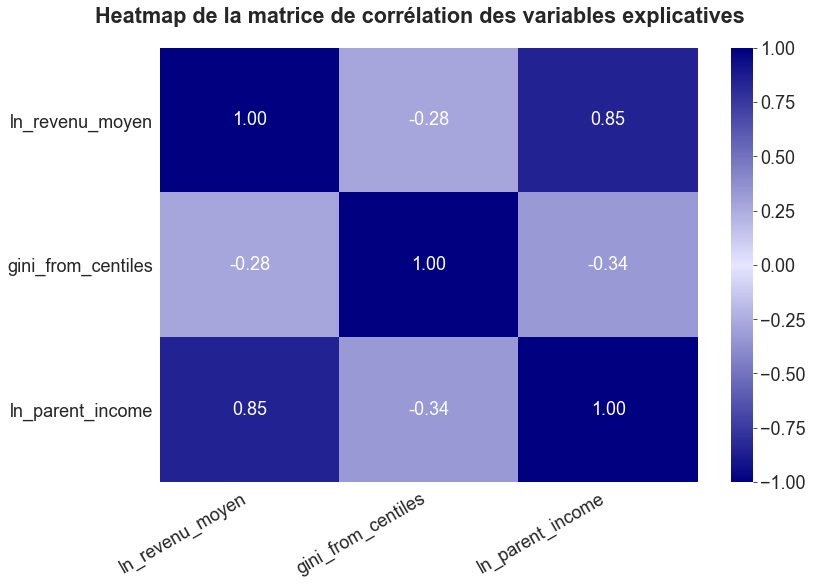

In [15]:
matrice_correl = np.corrcoef(data[["ln_revenu_moyen","gini_from_centiles","ln_parent_income"]], rowvar=False)
mygraph = sfg.MyGraph("Heatmap de la matrice de corrélation des variables explicatives", is_mono=True)
sns.heatmap(matrice_correl, vmin=-1, vmax=1, fmt='.2f', cmap=plc.LinearSegmentedColormap.from_list("", [mygraph.liste_couleurs[-1],mygraph.liste_couleurs[0],mygraph.liste_couleurs[-1]]), \
            cbar_kws={'ticks':[-1,-0.75,-0.5,-0.25,0,0.25,0.5,0.75,1]}, annot=True, ax=mygraph.ax[0])
mygraph.set_axe('y', tick_labels=["ln_revenu_moyen","gini_from_centiles","ln_parent_income"], rotation=0)
mygraph.set_axe('x', tick_labels=["ln_revenu_moyen","gini_from_centiles","ln_parent_income"], rotation=30, ha='right')
mygraph.fig.tight_layout()
fig, ax = mygraph.fig, mygraph.ax
plt.savefig("anova08_05_matrice_correl.png")
plt.show()

In [16]:
variables = anova.model.exog
vif_analysis = pd.DataFrame([variance_inflation_factor(variables, i) for i in np.arange(1,variables.shape[1])], \
                          index=[var for var in anova.model.exog_names if var!="Intercept"], columns=["VIF"])
print("ANALYSE DE LA MULTI-COLINÉARITÉ (l'indice VIF doit être inférieur à 4)")
vif_analysis

ANALYSE DE LA MULTI-COLINÉARITÉ (l'indice VIF doit être inférieur à 4)


,VIF
ln_revenu_moyen,3.547119
gini_from_centiles,1.126659
ln_parent_income,3.684043


Les deux variables logarithme du revenu des parents et logarithme du revenu moyen du pays sont très liées entre elles. Nous avons un cas de colinéarité simple entre ces deux variables avec un coefficient de corrélation linéaire simple de 0,85.  
Par contre, les indices VIF sont tous inférieurs à 4. Il n'y a pas de problème de colinéarité multiple.

**Vérification de la pertinence des estimations par rapport aux valeurs réelles**

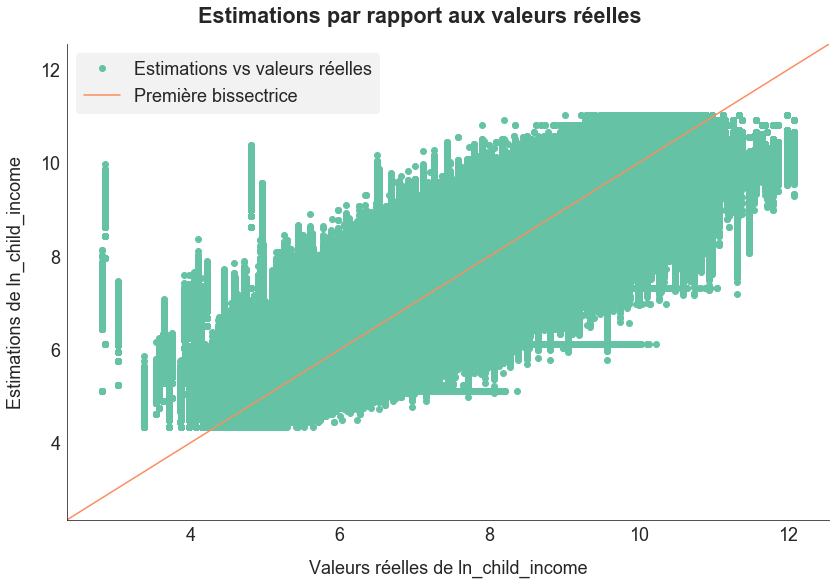

In [17]:
mygraph = sfg.MyGraph("Estimations par rapport aux valeurs réelles", is_mono=False)
mygraph.add_plot(data.ln_child_income, anova.fittedvalues, label="Estimations vs valeurs réelles", marker='o', linestyle="")
ymin, ymax = mygraph.ax[0].get_ylim()
xmin, xmax = mygraph.ax[0].get_xlim()
data_min = min(xmin, ymin)
data_max = max(xmax, ymax)
mygraph.add_plot([data_min, data_max], [data_min, data_max], label="Première bissectrice", legend=True)
mygraph.set_axe('y', label="Estimations de ln_child_income")
mygraph.set_axe('x', label="Valeurs réelles de ln_child_income")
mygraph.ax[0].autoscale(enable=True, axis='both', tight=True)
mygraph.fig.tight_layout()
fig, ax = mygraph.fig, mygraph.ax
plt.savefig("anova08_06_accuracy_graph.png")
plt.show()

Etant donné la diversité des situations étudiées, le graphique des valeurs estimées par rapport aux valeurs réelles est satisfaisant.

**Analyse des outliers**

In [18]:
n, p = anova.model.exog.shape
p = p - 1  # j'enlève la constante du nombre de paramètres pour ajuster les seuils
seuils = pd.Series(index=["levier", "resid_student", "dffits", "cook","dfbetas"])
seuils.levier = 2 * (p + 1) / n
seuils.dffits = 2 * np.sqrt((p + 1) / n)
seuils.cook = 4 / (n - p - 1)
seuils.resid_student = st.t.ppf(1-(0.05/2), n-p-2)  # seuil de 5% pour les résidus studentisés
reg_influence = anova.get_influence()
analyses = pd.DataFrame({"observation_name":data.index})
analyses["levier"] = reg_influence.hat_matrix_diag
#analyses["external_resid_student"] = reg_influence.resid_studentized_external
#analyses["outlier"] = ((analyses.levier > seuils.levier) | (abs(analyses.external_resid_student) > seuils.resid_student))
analyses["outlier"] = analyses.levier > seuils.levier
#analyses["dffits"] = reg_influence.dffits[0]
analyses["cook_distance"] = reg_influence.cooks_distance[0]
analyses["influence"] = analyses.cook_distance > seuils.cook
#analyses["influence"] = (abs(analyses.dffits) > seuils.dffits) | (analyses.cook_distance > seuils.cook)

In [19]:
seuils[["levier","cook"]].to_frame().style.format("{:.8f}")

,0
levier,0.00000142
cook,0.00000071


In [20]:
only_both = False
if only_both == False:
    print("Résumé des observations atypiques OU influentes")
    variables_speciales = analyses[(analyses.outlier | analyses.influence) & (analyses.outlier != analyses.influence)]
    print(variables_speciales)
    print("")
print("Résumé des observations atypiques ET influentes")
variables_investigation = analyses[analyses.outlier & analyses.influence]
variables_investigation

Résumé des observations atypiques OU influentes
         observation_name    levier  outlier  cook_distance  influence
31900               31900  0.000002     True   6.843939e-07      False
31901               31901  0.000002     True   6.843939e-07      False
32906               32906  0.000002     True   6.412792e-07      False
33399               33399  0.000002     True   6.192469e-07      False
33400               33400  0.000002     True   6.192469e-07      False
33401               33401  0.000002     True   6.192469e-07      False
33901               33901  0.000002     True   5.977699e-07      False
33902               33902  0.000002     True   5.977699e-07      False
34402               34402  0.000002     True   5.804695e-07      False
34403               34403  0.000002     True   5.804695e-07      False
34896               34896  0.000002     True   5.572712e-07      False
35397               35397  0.000002     True   5.343183e-07      False
35398               35398  0.

,observation_name,levier,outlier,cook_distance,influence
19441,19441,0.000002,True,1.316190e-06,True
20441,20441,0.000002,True,1.268031e-06,True
25423,25423,0.000002,True,9.968058e-07,True
26908,26908,0.000002,True,9.135775e-07,True
26909,26909,0.000002,True,9.135775e-07,True
27403,27403,0.000002,True,8.927872e-07,True
27404,27404,0.000002,True,8.927872e-07,True
27405,27405,0.000002,True,8.927872e-07,True
27909,27909,0.000002,True,8.668362e-07,True
27910,27910,0.000002,True,8.668362e-07,True


Le nombre d'observations atypiques ou influentes augmente. Le nombre d'observations à la fois atypiques et influentes augmente également.

**Conclusion sur ce modèle**

Le remplacement de la classe de revenu des parents par le logarithme des revenus des parents a 2 effets :  
- le R² augmente légèrement ;  
- la contribution des différentes variables au modèle est plus équilibrée ;  
- une colinéarité simple apparaît entre le logarithme du revenu des parents et le logarithme du revenu moyen du pays ;  
- des observations à la fois atypiques et influentes apparaissent à nouveau.  
  
**Pour éviter les effets de bord négatifs introduits par la colinéarité simple et l'apparition d'observations à la fois atypiques et influentes, je préfère le modèle précédent basé sur la classe de revenus des parents.**  
  
Je vais étudier le problème de la colinéarité simple. Pour le résoudre, je peux étudier le modèle basé sur le logarithme du revenu moyen et de l'indice de Gini d'une part (déjà fait) et le modèle basé sur le logarithme du revenu des parents et de l'indice de Gini d'autre part.  
Cette observation m'amène à calculer deux variantes :  
- le modèle basé sur le logarithme du revenu des parents et l'indice de Gini (comme évoqué juste avant). Cette analyse est menée dans le notebook [data_analyst_projet07_M47_modelisation07-variante1](data_analyst_projet07_M47_modelisation07-variante1.ipynb). Elle est rejetée, notamment du fait d'une moins bonne modélisation des valeurs extrêmes ;
- le modèle basé sur le produit (l'interaction) du logarithme du revenu des parents et du revenu moyen du pays et sur l'indice de Gini du pays, afin de garder les informations des 3 variables. Le notebook [data_analyst_projet07_M47_modelisation07-variante2](data_analyst_projet07_M47_modelisation07-variante2.ipynb) aboutit au rejet de cette variante, encore une fois notamment à cause de la mauvaise modélisation des valeurs extrêmes.

**Autres modèles à tester**  
Nous disposons d'une donnée que nous n'utilisons pas jusqu'ici dans nos modélisations : le coefficient d'élasticité. Je pense qu'il est intéressant et pertinent de tester son ajout aux modèles 6 et 7 pour voir son impact.  
Les notebooks [data_analyst_projet07_M48_modelisation08](data_analyst_projet07_M48_modelisation08.ipynb) et [data_analyst_projet07_M49_modelisation09](data_analyst_projet07_M49_modelisation09.ipynb) testent ces variantes. Ils aboutissent tous les deux à la même conclusion du rejet de l'ajout du coefficient d'élasticité.

Au final, le modèle 6 est celui que l'on retient.